# Linear and logistic regression

## 1. Business Understanding

## 2. Data Understanding

## 3. Data Preparation

In [28]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# fetch dataset 
real_estate_valuation = fetch_ucirepo(id=477) 
  
# data (as pandas dataframes) 
#X = real_estate_valuation.data.features
#y = real_estate_valuation.data.targets
X = pd.DataFrame(real_estate_valuation.data.features)
y = pd.DataFrame(real_estate_valuation.data.targets)


print("test")
# metadata 
##print(real_estate_valuation.metadata)
# variable information 
print(real_estate_valuation.variables)

real_estate_valuation.variables



test
                                     name     role        type demographic  \
0                                      No       ID     Integer        None   
1                     X1 transaction date  Feature  Continuous        None   
2                            X2 house age  Feature  Continuous        None   
3  X3 distance to the nearest MRT station  Feature  Continuous        None   
4         X4 number of convenience stores  Feature     Integer        None   
5                             X5 latitude  Feature  Continuous        None   
6                            X6 longitude  Feature  Continuous        None   
7              Y house price of unit area   Target  Continuous        None   

                                         description  \
0                                               None   
1  for example, 2013.250=2013 March, 2013.500=201...   
2                                               None   
3                                               None   
4  number of

,name,role,type,demographic,description,units,missing_values
0,No,ID,Integer,None,None,None,no
1,X1 transaction date,Feature,Continuous,None,"for example, 2013.250=2013 March, 2013.500=201...",None,no
2,X2 house age,Feature,Continuous,None,None,year,no
3,X3 distance to the nearest MRT station,Feature,Continuous,None,None,meter,no
4,X4 number of convenience stores,Feature,Integer,None,number of convenience stores in the living cir...,integer,no
5,X5 latitude,Feature,Continuous,None,"geographic coordinate, latitude",degree,no
6,X6 longitude,Feature,Continuous,None,"geographic coordinate, longitude",degree,no
7,Y house price of unit area,Target,Continuous,None,"10000 New Taiwan Dollar/Ping, where Ping is a ...",10000 New Taiwan Dollar/Ping,no


## 4. Modeling

### 4.1 Linear regression

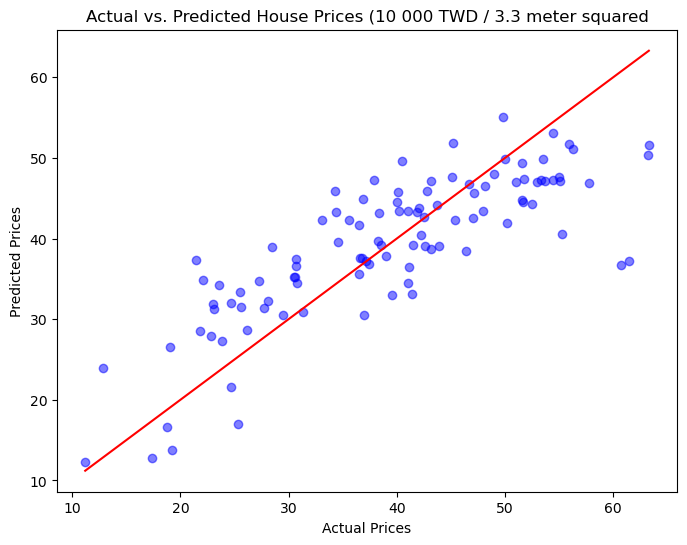

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Ideal 1:1 line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices (10 000 TWD / 3.3 meter squared")
plt.show()

### 4.2 Logistic regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

average = y.mean()
print(average)

average = y['Y house price of unit area'].mean()

y['Y house price of unit area'] = y['Y house price of unit area'].apply(lambda x: 1 if x >= average else 0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

reg = LogisticRegression(solver='lbfgs')
reg.fit(X,y)

Y house price of unit area    0.516908
dtype: float64


C:\Users\vilts\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

## 5. Evaluation

In [26]:
from sklearn.metrics import mean_absolute_error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

Mean absolute error: 5.63


## 6. Deployment